In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.preprocessing
import pyclustertend
import random
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# Cargar el dataset
file_path = "./movies.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Ver información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   budget                     10000 non-null  int64  
 2   genres                     9947 non-null   object 
 3   homePage                   4193 non-null   object 
 4   productionCompany          9543 non-null   object 
 5   productionCompanyCountry   8720 non-null   object 
 6   productionCountry          9767 non-null   object 
 7   revenue                    10000 non-null  float64
 8   runtime                    10000 non-null  int64  
 9   video                      9514 non-null   object 
 10  director                   9926 non-null   object 
 11  actors                     9920 non-null   object 
 12  actorsPopularity           9913 non-null   object 
 13  actorsCharacter            9953 non-null   obje

In [3]:

columns_to_drop = [
    "Id", "original_title", "title", "homePage", "video", "director", "genres",
    "productionCompany", "productionCompanyCountry", "productionCountry",
    "releaseDate", "actors", "actorsCharacter"
]
df = df.drop(columns=columns_to_drop, errors="ignore")

df = df.dropna()

scaler = sklearn.preprocessing.StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

df_scaled = pd.DataFrame(df_scaled, columns=df.select_dtypes(include=[np.number]).columns)

df_scaled.head()


,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount
0,-0.966148,-0.400149,-0.352576,-0.100692,-0.140641,-0.810970,0.281105,-0.529429,-0.468655,-0.252361,-0.040902
1,-0.966144,0.062903,-0.300087,0.343380,-0.192502,0.013970,-0.439645,0.341502,-0.074645,0.078546,-0.041289
2,-0.966125,-0.209481,4.784353,0.750446,0.223003,1.766968,5.926205,0.341502,-0.468655,-0.252361,-0.037809
3,-0.966121,2.051305,5.883079,-0.026680,0.381250,1.354498,5.665739,-0.529429,-0.862666,-0.252361,-0.040941
4,-0.966117,0.989008,4.131460,1.527572,0.033412,2.076320,8.043749,0.341502,-0.468655,-0.252361,-0.038930


### Evaluación de la tendencia de agrupamiento

Estadística de Hopkins: 0.01646384665961365


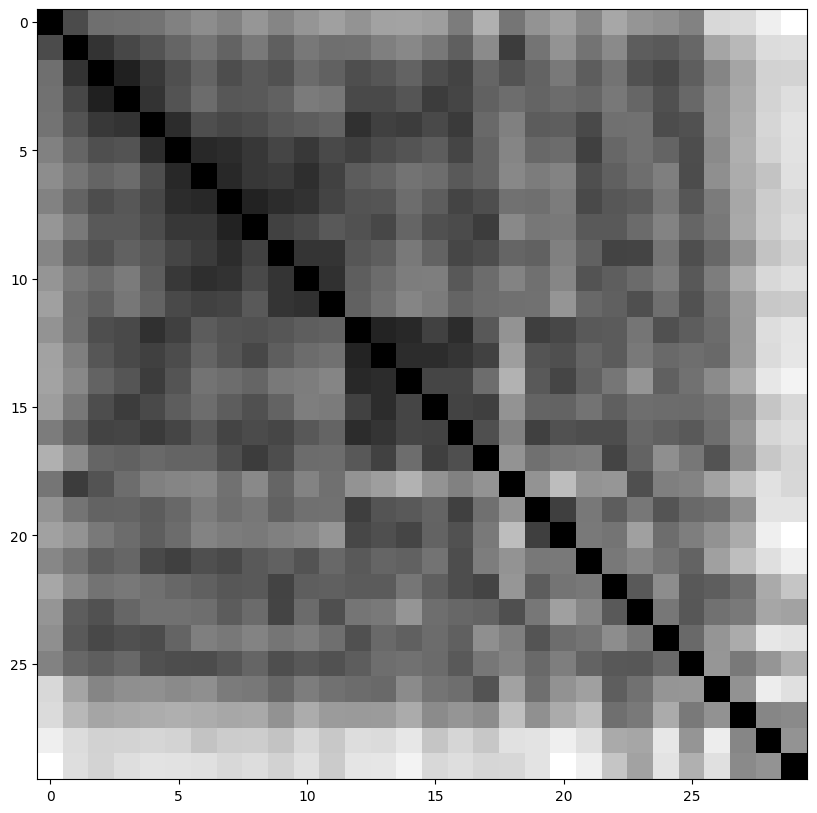

In [5]:


random.seed(123)


hopkins_stat = pyclustertend.hopkins(df_scaled.values, len(df_scaled))
print(f"Estadística de Hopkins: {hopkins_stat}")

sample_size = 30 if len(df_scaled) > 30 else len(df_scaled)
df_sample = df_scaled.sample(n=sample_size, random_state=42)


pyclustertend.vat(df_sample.values)


### Determinación del número óptimo de clústeres

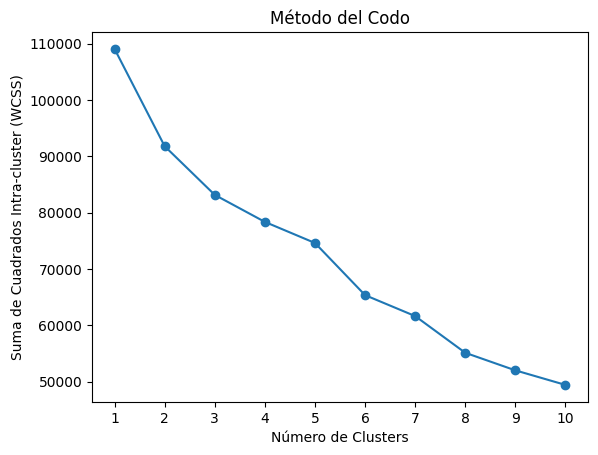

In [6]:
num_clusters = range(1, 11)
wcss = []

for i in num_clusters:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(num_clusters, wcss, marker="o")
plt.xticks(num_clusters)
plt.xlabel("Número de Clusters")
plt.ylabel("Suma de Cuadrados Intra-cluster (WCSS)")
plt.title("Método del Codo")
plt.show()